#  1. Importing Basic Libraries

In [479]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# 2. Loading Data and Visualizing and performing basic cleaning

In [480]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')


In [481]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [482]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [483]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [484]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We will Check whether there is redundant data in terms of duplicate pasenger IDs.

In [485]:
train['PassengerId'].value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

This shows that all passenger IDs are unique, Passenger ID, Name, Cabin and Ticket number don't necessarily affect the output and hence can be dropped. However Passenger ID will be needed for indexing the output and hence we will not drop it. 

In [486]:
train = train.drop(['Cabin','Ticket','Name'],axis=1)
test = test.drop(['Cabin','Ticket','Name'],axis=1)


In [487]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [488]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


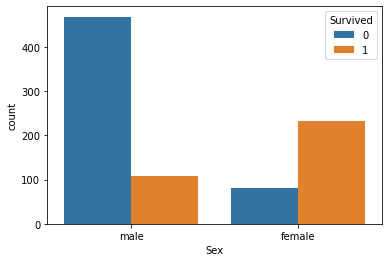

In [489]:
sns.countplot('Sex',data=train,hue='Survived')

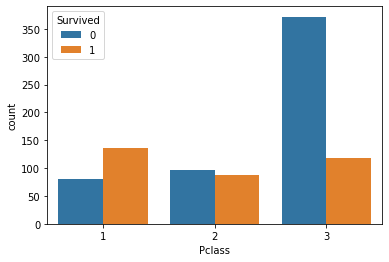

In [490]:
sns.countplot('Pclass',data=train,hue='Survived')

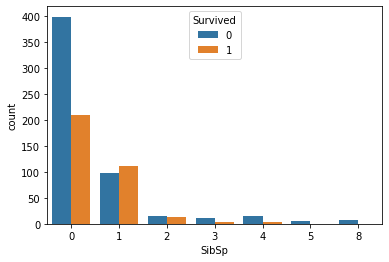

In [491]:
sns.countplot('SibSp',data=train,hue='Survived')

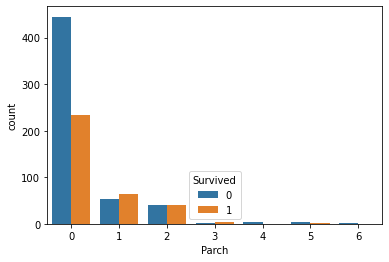

In [492]:
sns.countplot('Parch',data=train,hue='Survived')

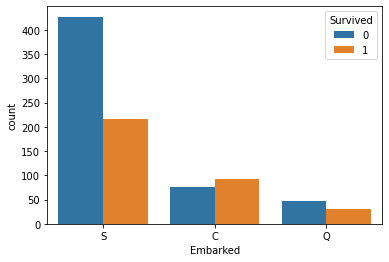

In [493]:
sns.countplot('Embarked',data=train,hue='Survived')

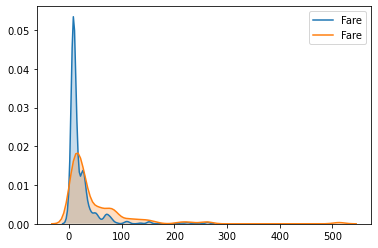

In [494]:
survived = train[train['Survived']==0]
died = train[train['Survived']==1]

a = sns.kdeplot(survived['Fare'],shade=True)
b = sns.kdeplot(died['Fare'],shade=True)


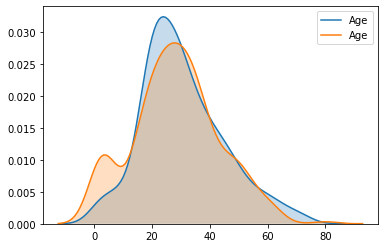

In [495]:
a = sns.kdeplot(survived['Age'],shade=True)
b = sns.kdeplot(died['Age'],shade=True)


# Data Preprocessing

In [496]:
train['Age'] = train['Age'].fillna(np.mean(train['Age']))

In [497]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [498]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].value_counts().index[0])
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [499]:
temp = train[['Pclass','Sex','Embarked']]
temp.head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [500]:
temp_1 = pd.get_dummies(temp, drop_first = True)
temp_1

,Pclass,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,1
1,1,0,0,0
2,3,0,0,1
3,1,0,0,1
4,3,1,0,1
...,...,...,...,...
886,2,1,0,1
887,1,0,0,1
888,3,0,0,1
889,1,1,0,0


In [501]:
train = train.drop(['Sex','Pclass','Embarked'], axis=1)
train = pd.concat((train, temp_1), axis = 1)

In [502]:
y = train["Survived"]
x = train.drop(['Survived'],1)


In [503]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


# Learning rate iterations and model training

In [504]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    model = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    model.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
    


Learning rate:  0.05
Accuracy score (training): 0.803
Learning rate:  0.075
Accuracy score (training): 0.815
Learning rate:  0.1
Accuracy score (training): 0.820
Learning rate:  0.25
Accuracy score (training): 0.843
Learning rate:  0.5
Accuracy score (training): 0.854
Learning rate:  0.75
Accuracy score (training): 0.867
Learning rate:  1
Accuracy score (training): 0.873


In [505]:
model_1 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.075, max_features=2, max_depth=2, random_state=0)
model_1.fit(x, y)

predictions = model_1.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[150  13]
 [ 34  71]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.92      0.86       163
           1       0.85      0.68      0.75       105

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



# Preprocessing test data set

In [506]:
test['Age'] = test['Age'].fillna(np.mean(test['Age']))
test['Embarked']=test['Embarked'].fillna(test['Embarked'].value_counts().index[0])
test['Fare']=test['Fare'].fillna(np.mean(test['Fare']))
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [507]:
temp_2 = test[['Pclass','Sex','Embarked']]
temp_3 = pd.get_dummies(temp_2, drop_first = True)

test = test.drop(['Sex','Pclass','Embarked'], axis=1)
test = pd.concat((test, temp_3), axis = 1)

# Prediction and taking final output

In [508]:

predictions_1 = model_1.predict(test)

output = pd.DataFrame({'PassengerId' : test.PassengerId, 'Survived':predictions_1})
output.to_csv('Submission.csv', index = False)
output.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
